# Effects of Outside Factors on Primary and Secondary Education
## Names:
### Conner Alubowicz
### Drew Halloran
### Arjun Kumar

## Introduction

### Research Questions:
How accurately can we predict student success from outside factors?  

In this project we are looking at 3 factors which include, parental level of education, whether or not they are on free lunch, and whether or not they took a test prep course. From these 3 features, we want to initially see to what accuracy we can classify students in their school grades. The 3 groups are, failing student (average grades less than 60), average student (grades between 60 and 90), and A student (grades 90 or better).


In [1]:
#load libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.inspection import permutation_importance

c:\Users\isocc\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


## Data Section

The data here was retrieved from Kaggle and is listed as public domain. It comes from an Exam Scores Data Generator created by Dr. Royce Kimmons, a professor of Instructional Psychology and Technology at BYU. While the data is fictitious, the generator was carefully created to follow realistic patterns and distributions found in actual student data. This type of data is commonly used for educational and analytical purposes.  

In [2]:
student_data = pd.read_csv('../data/exams.csv')
student_data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,male,group A,high school,standard,completed,67,67,63
1,female,group D,some high school,free/reduced,none,40,59,55
2,male,group E,some college,free/reduced,none,59,60,50
3,male,group B,high school,standard,none,77,78,68
4,male,group E,associate's degree,standard,completed,78,73,68


Average score was added to create one simple feature that was all inclusive of all exam scores. This makes it easier to predict one variable rather than multiple outputs. It was also determined that an average score was more indicitave of a students overall performance than just focusing on one specific exam score. Later on, we group these average scores into 3 classes as described in the introduction.

In [3]:
student_data['average_score'] = (student_data['math score'] + student_data['reading score'] + student_data['writing score']) / 3
student_data.head() 

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,average_score
0,male,group A,high school,standard,completed,67,67,63,65.666667
1,female,group D,some high school,free/reduced,none,40,59,55,51.333333
2,male,group E,some college,free/reduced,none,59,60,50,56.333333
3,male,group B,high school,standard,none,77,78,68,74.333333
4,male,group E,associate's degree,standard,completed,78,73,68,73.000000


Here, the data is checked to get basic statistics from it, and to check that there are no null values. We also decided against eliminating any outliers (students with very low exam grades), since they would simply fall into the same class as all other failing students, and their drastically low scores wouldn't have an effect when they become categorical.

In [4]:
student_data.describe()

,math score,reading score,writing score,average_score
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,66.396000,69.002000,67.738000,67.712000
std,15.402871,14.737272,15.600985,14.514244
min,13.000000,27.000000,23.000000,21.666667
25%,56.000000,60.000000,58.000000,58.583333
50%,66.500000,70.000000,68.000000,67.333333
75%,77.000000,79.000000,79.000000,78.333333
max,100.000000,100.000000,100.000000,100.000000


In [5]:
student_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   gender                       1000 non-null   object 
 1   race/ethnicity               1000 non-null   object 
 2   parental level of education  1000 non-null   object 
 3   lunch                        1000 non-null   object 
 4   test preparation course      1000 non-null   object 
 5   math score                   1000 non-null   int64  
 6   reading score                1000 non-null   int64  
 7   writing score                1000 non-null   int64  
 8   average_score                1000 non-null   float64
dtypes: float64(1), int64(3), object(5)
memory usage: 70.4+ KB


c:\Users\isocc\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


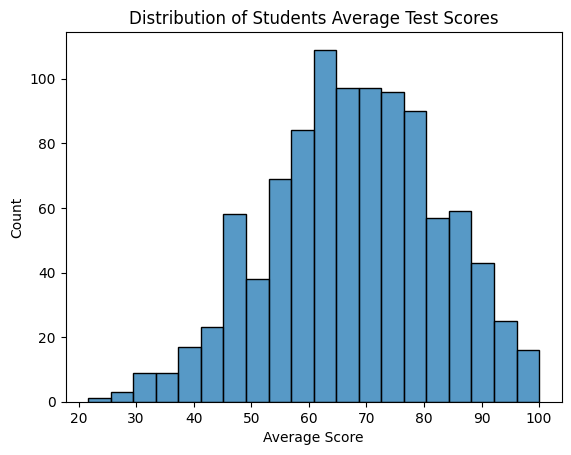

In [6]:
sns.histplot(student_data, x = 'average_score', bins = 20)
plt.title("Distribution of Students Average Test Scores")
plt.xlabel("Average Score")
plt.ylabel("Count")
plt.show()

c:\Users\isocc\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


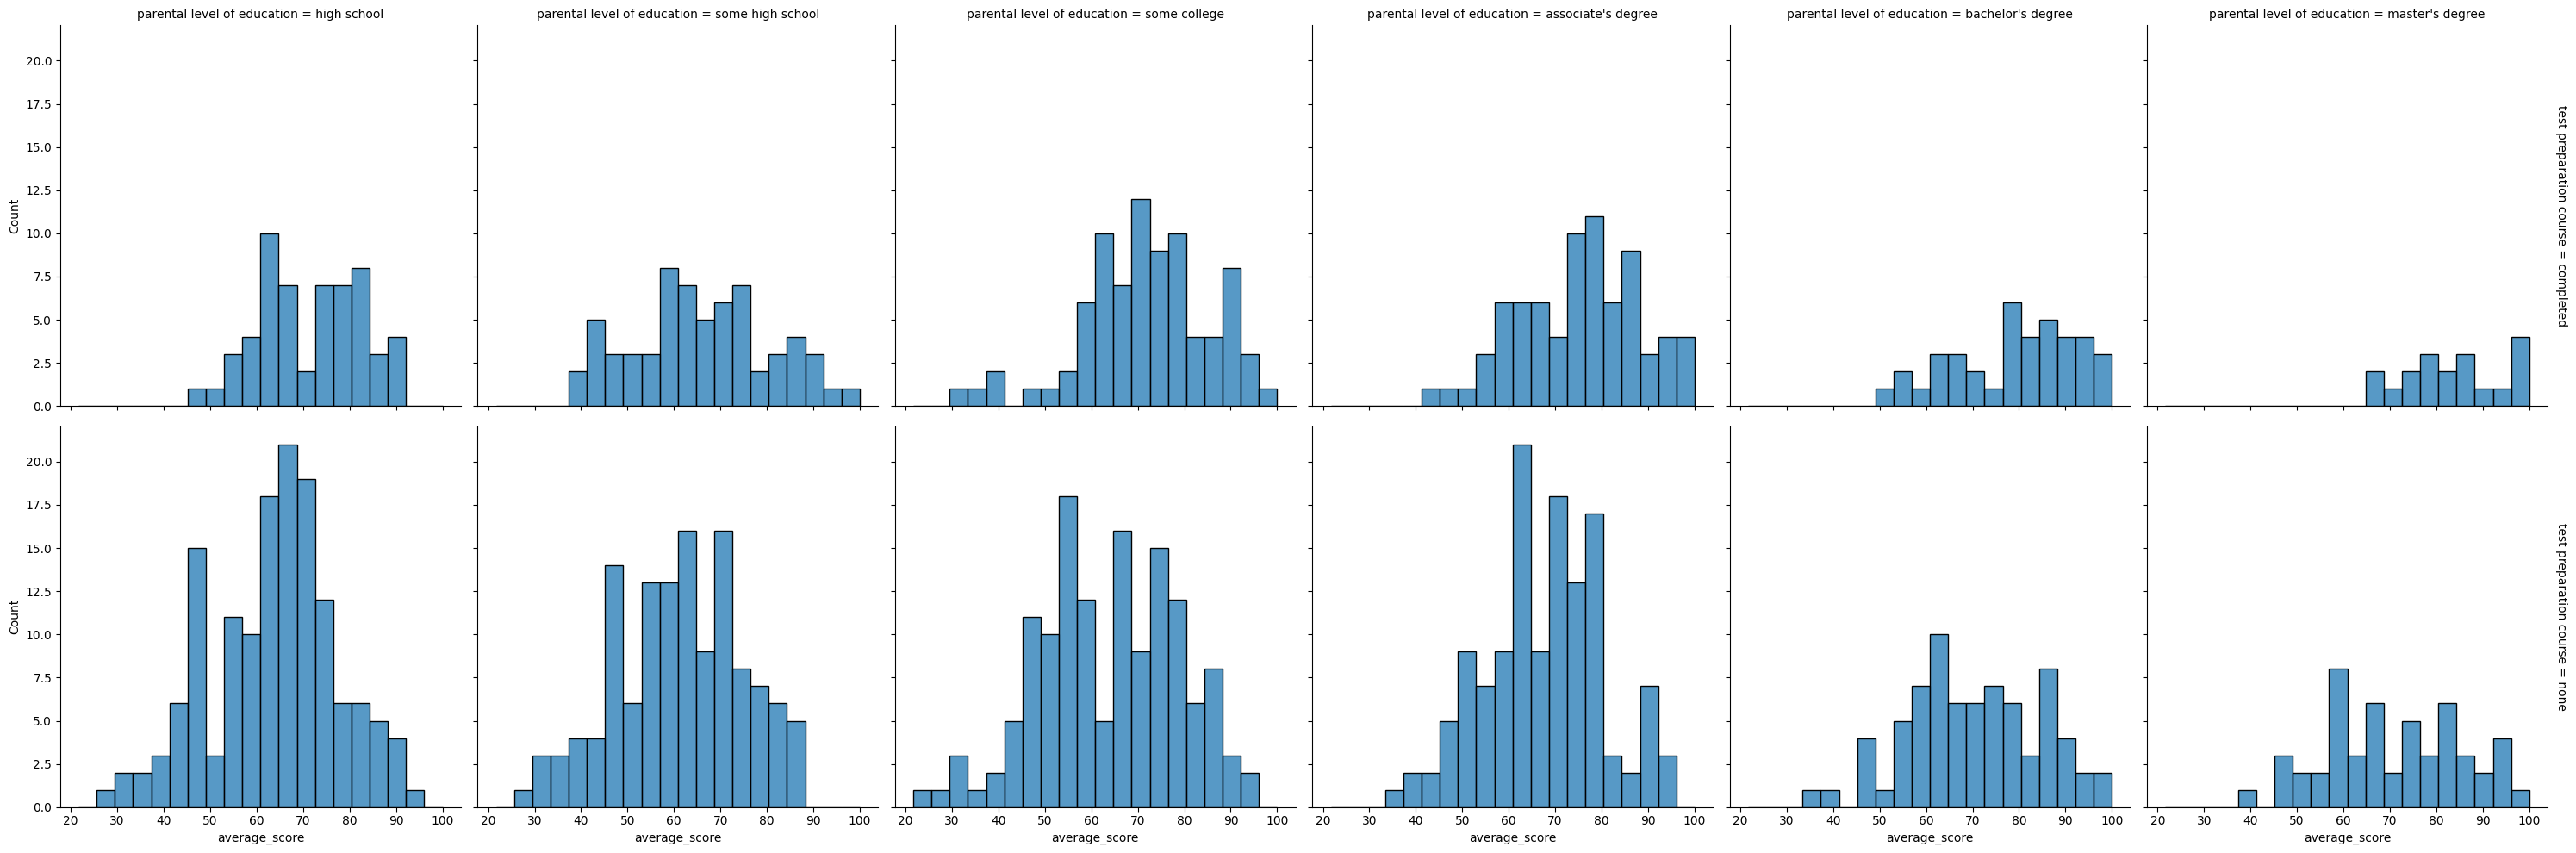

In [17]:
sns.displot(student_data, x='average_score',col='parental level of education', row='test preparation course',facet_kws=dict(margin_titles=True))

c:\Users\isocc\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\isocc\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\isocc\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\isocc\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a len

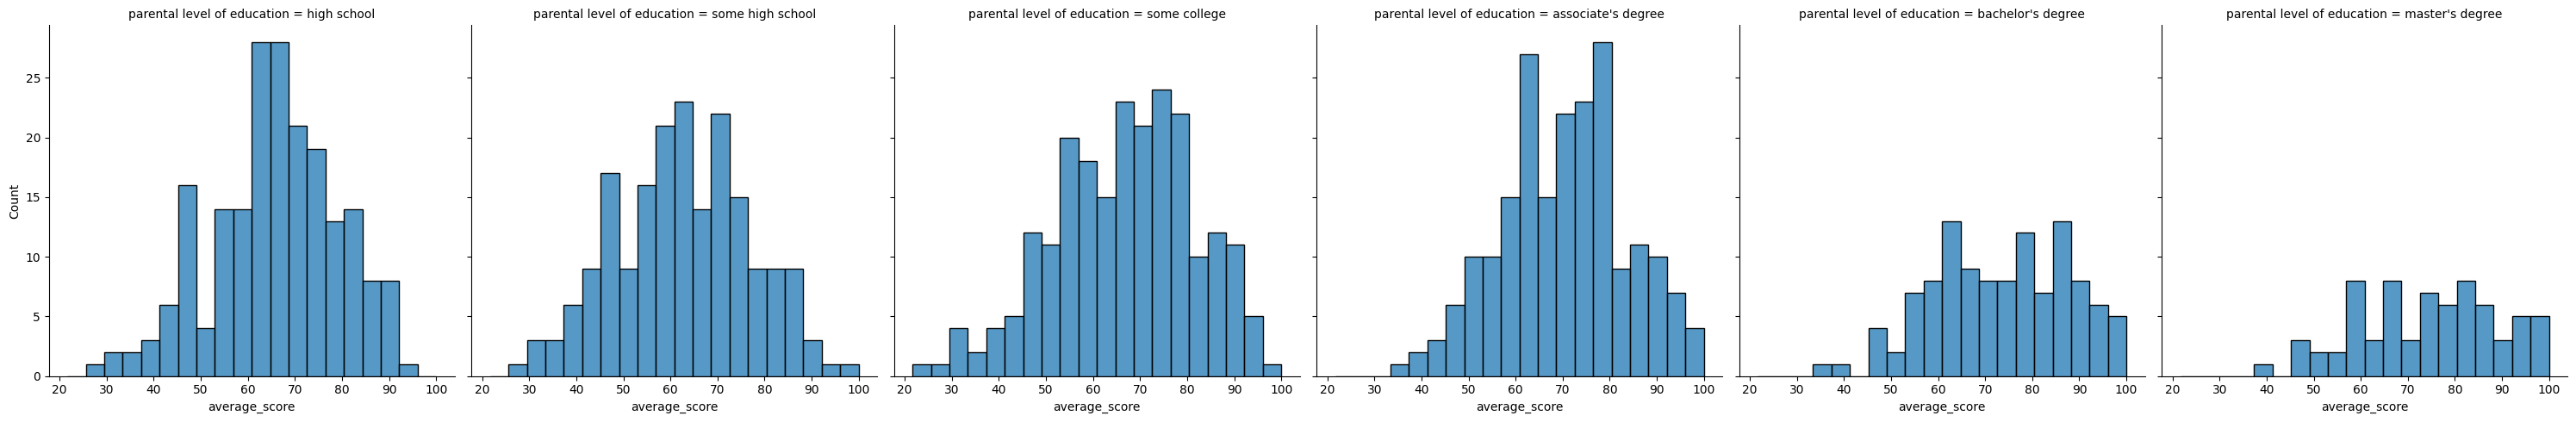

In [18]:
sns.displot(student_data, x='average_score',col='parental level of education',facet_kws=dict(margin_titles=True))

c:\Users\isocc\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\isocc\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\isocc\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\isocc\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a len

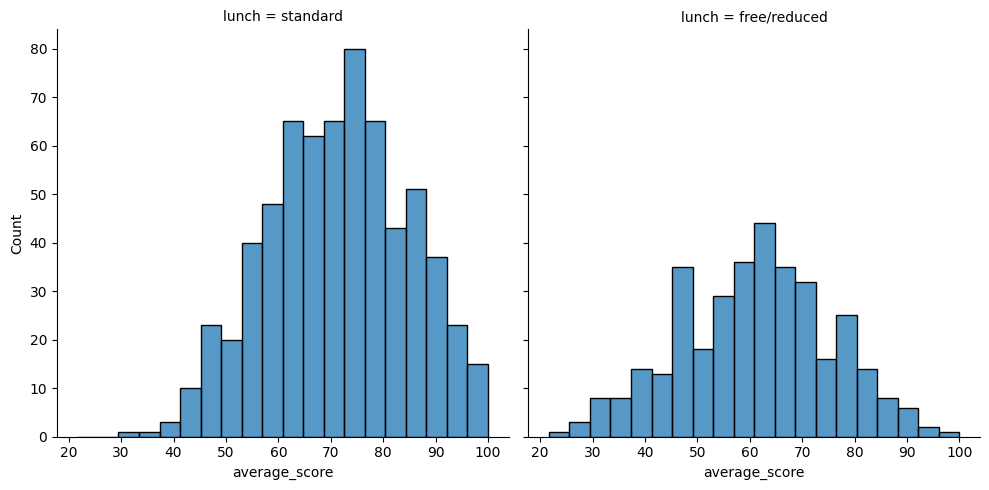

In [19]:
sns.displot(student_data, x='average_score',col='lunch',facet_kws=dict(margin_titles=True))

## Data Analysis Section  

Given that the goal of this project is to place students in a correct category, we will use a classification method in solving this. It was decided that using support vector machine (SVM), with grid search cv to test various models, was the best method to follow.  

In [7]:
def categorize_performance(score):
    if score < 60:
        return 0
    elif 60 <= score < 90:
        return 1
    else:
        return 2

student_data['performance_category'] = student_data['average_score'].apply(categorize_performance)

One hot encoding was necessary for this problem, given that one of the features used was non-binary, and therefore had to be broken up into multiple binary features. It is also worth noting here that we are dropping the gender and race/ethnicity categories. The reason for this being that we want to avoid any missuse of the results of the project. This project is far too simple to gauge any meaningful insights about race and gender in test results.

In [8]:
student_data_encoded = pd.get_dummies(student_data, columns=['parental level of education', 'lunch', 'test preparation course'], drop_first=True)
student_data_encoded.drop(['gender','race/ethnicity','math score','reading score','writing score'], axis = 1, inplace = True)
student_data_encoded.head()

,average_score,performance_category,parental level of education_bachelor's degree,parental level of education_high school,parental level of education_master's degree,parental level of education_some college,parental level of education_some high school,lunch_standard,test preparation course_none
0,65.666667,1,False,True,False,False,False,True,False
1,51.333333,0,False,False,False,False,True,False,True
2,56.333333,0,False,False,False,True,False,False,True
3,74.333333,1,False,True,False,False,False,True,True
4,73.000000,1,False,False,False,False,False,True,False


Here, we specified the 3 predictor variables, parental level of education, lunch type, and test prep type. We also specified the output as the performance category as defined in the categorize_performance(score) function.

In [9]:
X = student_data_encoded.drop(['average_score', 'performance_category'], axis = 1)
y = student_data_encoded['performance_category']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, random_state = 42)

This model uses support vector machines (SVM), and grid search cv to find the most optimal combination of paraneters for the model. By defining a the dictionary 'param_grid', we are specifying all the different parameters to try in this analysis. Since there are 4 options for each parameter, we have 5x4x4 = 80 different combinations to try.  

C is a regularization parameter, where lower values mean higher regularization. By controlling this, we can control how much overfitting the model has.  

Gamma is a parameter that effects the influence of individual points on the svm boundary. A high gamma means that values really close to the boundary have a high 'cost' associated with them, so the model will try hard to avoid missclassifying these points. A low gamma meams that the 'cost' between points close and far aren't that different, therefore it won't try as hard to get around certain points. In essence, a higher gamma has a higher chance of overfitting the data than a low gamma value.  

Kernel is the specific function you want to use to calculate your output. By using a linear kernel, you would have a linear boundary, which is best if the data is linearly seperable. All of the other kernels work better for more complex boundaries. 

In [10]:
param_grid = {
    'C': [.01, 0.1, 1, 10, 100],
    'gamma': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid']
}

svm = SVC()

grid_search = GridSearchCV(estimator=svm, param_grid=param_grid, cv=5, scoring='accuracy', verbose=0)
grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)
print("Best Accuracy:", grid_search.best_score_)

Best Parameters: {'C': 0.1, 'gamma': 1, 'kernel': 'poly'}
Best Accuracy: 0.6799999999999999


In [11]:
perm_importance = permutation_importance(grid_search.best_estimator_, X_test, y_test, scoring='accuracy')

for i, col in enumerate(X.columns):
    print(f"Feature: {col}, Importance: {perm_importance.importances_mean[i]}")


Feature: parental level of education_bachelor's degree, Importance: 0.0
Feature: parental level of education_high school, Importance: 0.0
Feature: parental level of education_master's degree, Importance: 0.0
Feature: parental level of education_some college, Importance: -0.0010000000000000009
Feature: parental level of education_some high school, Importance: -0.0040000000000000036
Feature: lunch_standard, Importance: 0.05800000000000005
Feature: test preparation course_none, Importance: 0.0050000000000000044


In [12]:
baseline_accuracy = y.value_counts().max() / len(y)
print(f"Baseline Accuracy: {baseline_accuracy:.2f}")

Baseline Accuracy: 0.65


### Now, a new model will be tested where we try to classify each group into an above average or below average student.

In [13]:
def categorize_performance(score):
    if score < 67.7:
        return 0
    else:
        return 1

student_data['performance_category'] = student_data['average_score'].apply(categorize_performance)

In [14]:
student_data_encoded = pd.get_dummies(student_data, columns=['parental level of education', 'lunch', 'test preparation course'], drop_first=True)
student_data_encoded.drop(['gender','race/ethnicity','math score','reading score','writing score'], axis = 1, inplace = True)

X = student_data_encoded.drop(['average_score', 'performance_category'], axis = 1)
y = student_data_encoded['performance_category']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, random_state = 42)

In [15]:
param_grid = {
    'C': [.001, .01, 0.1, 1, 10, 100],
    'gamma': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid']
}

svm = SVC()

grid_search = GridSearchCV(estimator=svm, param_grid=param_grid, cv=5, scoring='accuracy', verbose=0)
grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)
print("Best Accuracy:", grid_search.best_score_)

Best Parameters: {'C': 0.01, 'gamma': 0.1, 'kernel': 'linear'}
Best Accuracy: 0.63625


In [16]:
perm_importance = permutation_importance(grid_search.best_estimator_, X_test, y_test, scoring='accuracy')

for i, col in enumerate(X.columns):
    print(f"Feature: {col}, Importance: {perm_importance.importances_mean[i]}")

Feature: parental level of education_bachelor's degree, Importance: -0.008000000000000007
Feature: parental level of education_high school, Importance: 0.006000000000000005
Feature: parental level of education_master's degree, Importance: 0.0010000000000000009
Feature: parental level of education_some college, Importance: -0.008000000000000007
Feature: parental level of education_some high school, Importance: 0.03400000000000003
Feature: lunch_standard, Importance: 0.132
Feature: test preparation course_none, Importance: 0.01100000000000001


## Results

We were able to correctly classify a student into 1 of 3 classes 68% of the time, compared to the baseline accuracy of 65%.  
We were able to correctly classify a student into 1 of 3 classes (above or below average) 64% of the time, compared to the baseline accuracy of 50%.

The parameters of the SVM that gave us the first model were a regularizatio parameter C value = 0.1, a gamma value = 1, and a kernel = 'poly'.  

The parameters of the SVM that gave us the first model were a regularizatio parameter C value = 0.01, a gamma value = 0.1, and a kernel = 'linear'. 

In looking at the results above, it can be seen that it is infeasable to accurately seperate kids into classes of very low, average, and very succesful. This is likely because the first model didn't have strict enough bariers between class outputs. This is why the second model, where the two outputs are above and below average, is much better to compare against a random guess (i.e. a coin flip).  

The feature importance analysis indicates that lunch_standard is the most influential factor in predicting performance, likely reflecting socio-economic advantages. Completing a test preparation course also has a positive impact, though less significant. Interestingly, "some high school" for parental education shows a slight positive contribution, while other levels like "bachelor's degree" or "some college" have minimal or negative impacts, possibly due to redundancy or indirect relationships. These results suggest that socio-economic factors, such as lunch type and access to test preparation, may have a stronger influence on student performance than parental education. This is also likely why there is strong regularization to diminish some of those dominating features. Further exploration of feature interactions or removal of negative contributors could improve model clarity and performance.



## Discussion

Research Questions: How accurately can we predict student success from outside factors?  

The answer to this question is noticeably, but not largely more accurately than a random guess. When working to solve this problem, we ran into issues with the first model setup as seen above. The 3 class output was not very accurate, therefore, it was better to focus on that average cutoff grade of 67%. When this occured, accuracy from the baseline increased by almost 14%, which is a noticeable improvement, considering we are only looking at 3 features. This suggests that there are many socio-economic factors that effect a student's grade. Of course, there are plenty of other factors, and students are still largely individual in their outcomes, which stops this accuracy from increasing by a larger amount. However, this is significant enough that we can consider certain reform that helps some of these underprivileged students to get above average test scores.  

Again, it is important to remember that this data set is ficticious, but still is meant to mimic a realistic dataset.  

In the future, to improve results, more features shall be considered, and individual analysis of single features can be done to gauge their specific effects. By finding about the specific effects of each feature, we can gauge whether or not free/reduced test prep is needed for underpriveleged students. Also, various other school programs can be considered that aid students from worse backgrounds. 


## Citations  

Citations:
Li, Z., & Qiu, Z. (2018). How does family background affect children’s educational achievement? Evidence from contemporary china. The Journal of Chinese Sociology, 5(1). https://doi.org/10.1186/s40711-018-0083-8  

Mineo, L. (2023, November 22). Wide gap in SAT/ACT test scores between wealthy, lower-income kids. Harvard Gazette. https://news.harvard.edu/gazette/story/2023/11/new-study-finds-wide-gap-in-sat-act-test-scores-between-wealthy-lower-income-kids/  

‌Hannon, B. (2015). Hispanics’ SAT Scores. Hispanic Journal of Behavioral Sciences, 37(2), 204–222. https://doi.org/10.1177/0739986315573249
